# EE559 HW34

## Qirui Sun

## 1. Time Series Classiﬁcation  

An interesting task in machine learning is classiﬁcation of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.


###  (a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\ %29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple ﬁles each of which represents an instant of a human performing an activity.1 Each ﬁle containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values. 

### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data. 

In [1]:
import numpy as np
import matplotlib as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
data_sum = {}
dir_pre =  "AReM/"
directories = os.listdir(dir_pre)
for direc in directories:
    files = os.listdir(dir_pre + direc)
    for file in files:
        if direc == "bending2" and file == "dataset4.csv":
            new_names = ['Time','Avg_RSS12', 'Var_RSS12', 'Avg_RSS13', 'Var_RSS13', 'Avg_RSS23', 'Var_RSS23','del']
            data_sum["bending2_dataset4.csv"]  = pd.read_csv(dir_pre + "bending2" + "/" + "dataset4.csv", delimiter=" ", skiprows=5,names =new_names).drop(['del'],axis = 1)
        else:
            new_names = ['Time','Avg_RSS12', 'Var_RSS12', 'Avg_RSS13', 'Var_RSS13', 'Avg_RSS23', 'Var_RSS23']
            data_sum[direc + "_" + file] = pd.read_csv(dir_pre + direc + "/" + file, delimiter=",", skiprows=5, names=new_names)

In [3]:
len(data_sum.keys())

88

In [3]:
# split the data
test_key = []
test_data = {}
train_data = {}

for k in  os.listdir(dir_pre):
    for i in range(1,4):
        test_key.append(k+'_'+'dataset'+str(i)+'.csv')
test_key.remove('bending1_dataset3.csv')     
test_key.remove('bending2_dataset3.csv') 
for k in data_sum.keys():
    if k in test_key:
        test_data[k] = data_sum[k]
    else:
        train_data[k] = data_sum[k]

In [4]:
print(len(train_data.keys()),len(test_data.keys()))

69 19


### (c) Feature Extraction

  Classiﬁcation of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

####  i. Research what types of time-domain features are usually used in time series classiﬁcation and list them (examples are minimum, maximum, mean, etc). 

    i Answer: Minimum, maximum, mean, median, standard deviation, first quartile, and third quartile are usually used in time series classification.

#### ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, ﬁrst quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [5]:
def stat_cal(list1):
    mini = min(list1)
    maxi = max(list1)
    mean = stat.mean(list1)
    median = stat.median(list1)
    std = list1.std()
    first_quartile = list1.quantile(0.25)
    third_quartile = list1.quantile(0.75)
    return [mini,maxi,mean,median,std,first_quartile,third_quartile] 

In [6]:
import statistics as stat

stat_total = []
k = 1
for key in data_sum.keys():
    df_iter = [k]
    names = ["Instance"]
    for index, col in enumerate(data_sum[key].columns[1:]):
        
        df_iter+=stat_cal(data_sum[key][col])
        title = [col + "_minimum",col + "_maximum",col + "_mean"
                ,col + "_median",col + "_standard_deviation",col + "_1_quartile"
                ,col + "_3_quartile"]
        names+=title
    stat_total.append(df_iter)
    k+=1


data_df = pd.DataFrame(stat_total, columns=names)
data_df.set_index('Instance', inplace=True)
data_df

,Avg_RSS12_minimum,Avg_RSS12_maximum,Avg_RSS12_mean,Avg_RSS12_median,Avg_RSS12_standard_deviation,Avg_RSS12_1_quartile,Avg_RSS12_3_quartile,Var_RSS12_minimum,Var_RSS12_maximum,Var_RSS12_mean,...,Avg_RSS23_standard_deviation,Avg_RSS23_1_quartile,Avg_RSS23_3_quartile,Var_RSS23_minimum,Var_RSS23_maximum,Var_RSS23_mean,Var_RSS23_median,Var_RSS23_standard_deviation,Var_RSS23_1_quartile,Var_RSS23_3_quartile
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
2,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
3,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
4,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
5,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
85,21.50,51.00,34.935812,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
86,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200


#### iii. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

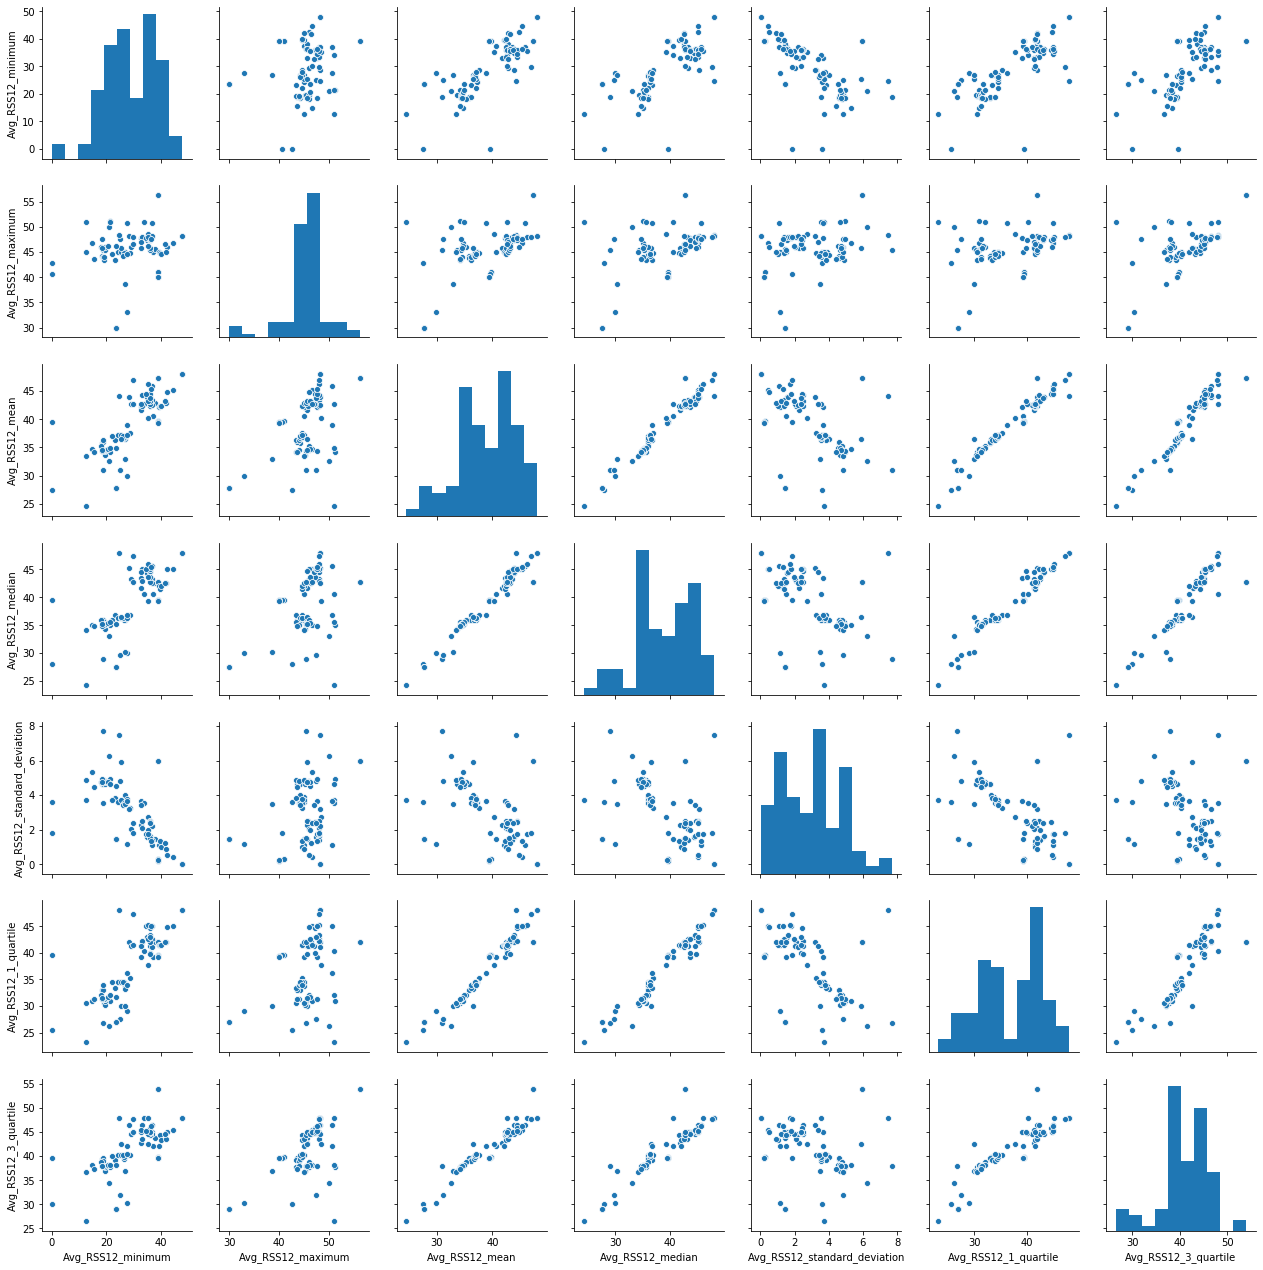

In [9]:
df1 = data_df[['Avg_RSS12_minimum','Avg_RSS12_maximum','Avg_RSS12_mean','Avg_RSS12_median','Avg_RSS12_standard_deviation','Avg_RSS12_1_quartile','Avg_RSS12_3_quartile']]
sns.pairplot(df1)

Answer: The three most important time-domain features are **min, mean, and max**

### (d) Binary Classiﬁcation Using Logistic Regression

#### i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classiﬁcation problem. Depict scatter plots of the features you speciﬁed in 1(c)iii extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).


In [19]:
name_list = ['Avg_RSS12','Val_RSS12','Var_RSS23']
feature = ['minimum','maximum','mean']
list1 = []
for name in name_list:
    for k in feature:
        list1.append(name+'_'+k)
list1

['Avg_RSS12_minimum',
 'Avg_RSS12_maximum',
 'Avg_RSS12_mean',
 'Val_RSS12_minimum',
 'Val_RSS12_maximum',
 'Val_RSS12_mean',
 'Var_RSS23_minimum',
 'Var_RSS23_maximum',
 'Var_RSS23_mean']

In [20]:
import statistics as stat
import seaborn as sns

stat_total = []
k = 1
label = []
for key in train_data.keys():
    df_iter = [k]
    
    if 'bending' in key:
        label.append(1)
    else:
        label.append(0)
        
    names = ["Instance"]
    for index, col in enumerate(data_sum[key].columns[1:]):
        df_iter+=stat_cal(data_sum[key][col])
        title = [col + "_minimum",col + "_maximum",col + "_mean"
                ,col + "_median",col + "_standard_deviation",col + "_1_quartile"
                ,col + "_3_quartile"]
        names+=title
    stat_total.append(df_iter)
    k+=1


data_df = pd.DataFrame(stat_total, columns=names)
data_df.set_index('Instance', inplace=True)

In [21]:
def color_try(label,c0,c1):
    temp = []
    for i in label:
        if i==0:
            temp.append(c0)
        else:
            temp.append(c1)
    return temp

In [22]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

name_list = ['Avg_RSS12','Var_RSS12','Var_RSS23']
feature = ['minimum','maximum','mean']
list1 = []
for name in name_list:
    for k in feature:
        list1.append(name+'_'+k)
df1 = data_df[list1]
#pd.plotting.scatter_matrix(df1, c = label,figsize=(20,20))
#plt.show()
df1

,Avg_RSS12_minimum,Avg_RSS12_maximum,Avg_RSS12_mean,Var_RSS12_minimum,Var_RSS12_maximum,Var_RSS12_mean,Var_RSS23_minimum,Var_RSS23_maximum,Var_RSS23_mean
Instance,,,,,,,,,
1,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292
2,33.00,47.75,42.179812,0.0,3.00,0.696042,0.0,2.18,0.613521
3,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292
4,37.00,48.00,43.454958,0.0,1.58,0.378083,0.0,5.26,0.679646
5,36.25,48.00,43.969125,0.0,1.50,0.413125,0.0,2.96,0.555312
...,...,...,...,...,...,...,...,...,...
65,20.75,46.25,34.763333,0.0,12.68,4.223792,0.0,9.39,3.288271
66,21.50,51.00,34.935812,0.0,12.21,4.115750,0.0,10.21,3.280021
67,18.33,47.67,34.333042,0.0,12.48,4.396958,0.0,8.01,3.261583


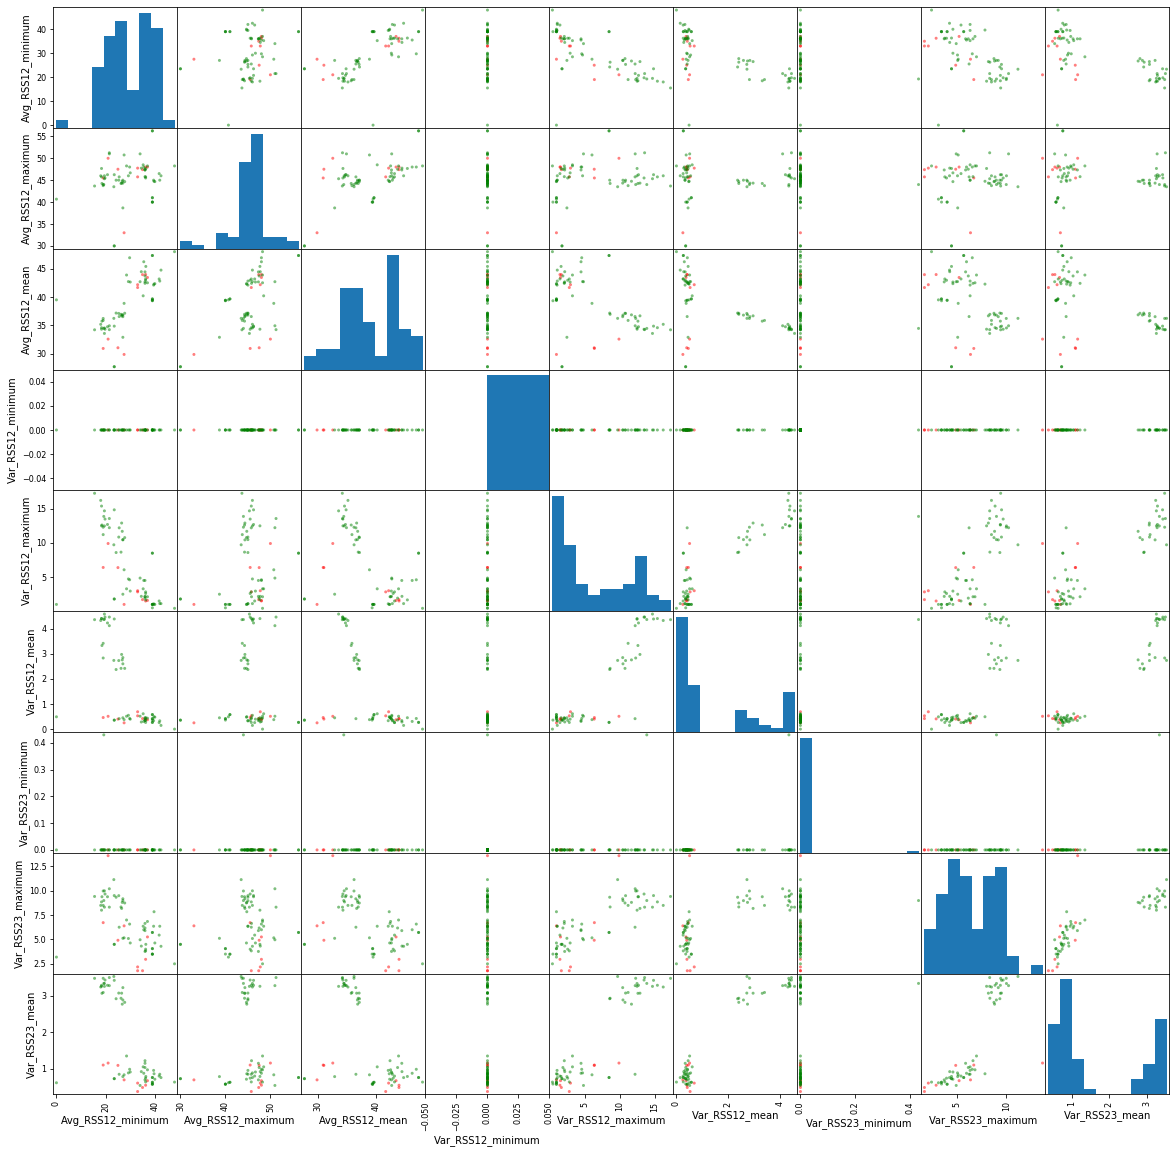

In [23]:
pd.plotting.scatter_matrix(df1, c = color_try(label,'g','r'),figsize=(20,20))
plt.show()

#### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable diﬀerence in the results with those of 1(d)i?

In [7]:
import statistics as stat
def split_data(data_sum,train_data,num):
    k = 1
    I = [str(i+1) for i in range(num)]
    stat_total = []
    label = []
    for key in train_data.keys():
        df_iter = [k]
        names = ["Instance"]
        if 'bending' in key:
            label.append(1)
        else:
            label.append(0)

        for index, col in enumerate(data_sum[key].columns[1:]):
            data = {}
            len_unit = int(np.floor(len(data_sum[key][col])/num))
            for j in  I:
                if j == I[-1]:
                    data[j] = data_sum[key][col][(int(j)-1)*len_unit:len(data_sum[key][col])-1]
                else:
                    data[j] = data_sum[key][col][(int(j)-1)*len_unit:int(j)*len_unit]

            for item in I:

                df_iter+=stat_cal(data[item])
                
                title = [col +'_'+item + "_minimum",col+'_'+item  + "_maximum",col+'_'+item  + "_mean"
                    ,col+'_'+item  + "_median",col+'_'+item  + "_standard_deviation",col +'_'+item + "_1_quartile"
                    ,col +'_'+item + "_3_quartile"]
                
                names += title
        stat_total.append(df_iter)
        k+=1
        
    data_frame = pd.DataFrame(stat_total, columns=names)
    data_frame.set_index('Instance', inplace=True)
    
    df_label = pd.DataFrame(label)
    return data_frame,label

In [8]:
df_dual,label_dual = split_data(data_sum,train_data,2)
df_dual

,Avg_RSS12_1_minimum,Avg_RSS12_1_maximum,Avg_RSS12_1_mean,Avg_RSS12_1_median,Avg_RSS12_1_standard_deviation,Avg_RSS12_1_1_quartile,Avg_RSS12_1_3_quartile,Avg_RSS12_2_minimum,Avg_RSS12_2_maximum,Avg_RSS12_2_mean,...,Var_RSS23_1_standard_deviation,Var_RSS23_1_1_quartile,Var_RSS23_1_3_quartile,Var_RSS23_2_minimum,Var_RSS23_2_maximum,Var_RSS23_2_mean,Var_RSS23_2_median,Var_RSS23_2_standard_deviation,Var_RSS23_2_1_quartile,Var_RSS23_2_3_quartile
Instance,,,,,,,,,,,,,,,,,,,,,
1,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,35.00,47.40,43.837615,...,0.526656,0.0000,1.0000,0.00,1.50,0.384519,0.00,0.475862,0.000,0.710
2,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,33.00,46.00,41.071674,...,0.554542,0.0000,1.2200,0.00,2.18,0.586736,0.47,0.492800,0.000,0.870
3,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,39.25,43.67,41.735900,...,0.411200,0.0000,0.7100,0.00,1.50,0.348954,0.43,0.363205,0.000,0.500
4,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,37.00,46.50,42.798285,...,0.718016,0.4300,1.1200,0.00,4.06,0.541046,0.50,0.472402,0.430,0.710
5,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,36.25,48.00,44.451841,...,0.486847,0.0000,0.8300,0.00,2.96,0.586109,0.50,0.488910,0.415,0.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,22.33,46.00,34.966250,35.500,4.733014,32.0000,38.7500,20.75,46.25,34.568326,...,1.638218,1.7975,4.2175,0.00,9.39,3.411715,3.35,1.626291,2.170,4.415
66,21.50,45.67,34.737042,35.500,4.276717,32.0000,37.7500,21.75,51.00,35.143515,...,1.737573,2.1800,4.5125,0.00,10.21,3.228996,3.09,1.668136,2.050,4.380
67,18.33,45.00,33.886458,34.375,5.143776,30.4575,37.5000,20.33,47.67,34.766151,...,1.565557,2.0500,4.2250,0.00,8.01,3.272971,2.95,1.673871,2.050,4.455


In [17]:
name_list = ['Avg_RSS12_1','Var_RSS12_1','Var_RSS23_2']
feature = ['minimum','maximum','mean']
list1 = []
for name in name_list:
    for k in feature:
        list1.append(name+'_'+k)
df1 = df_dual[list1]

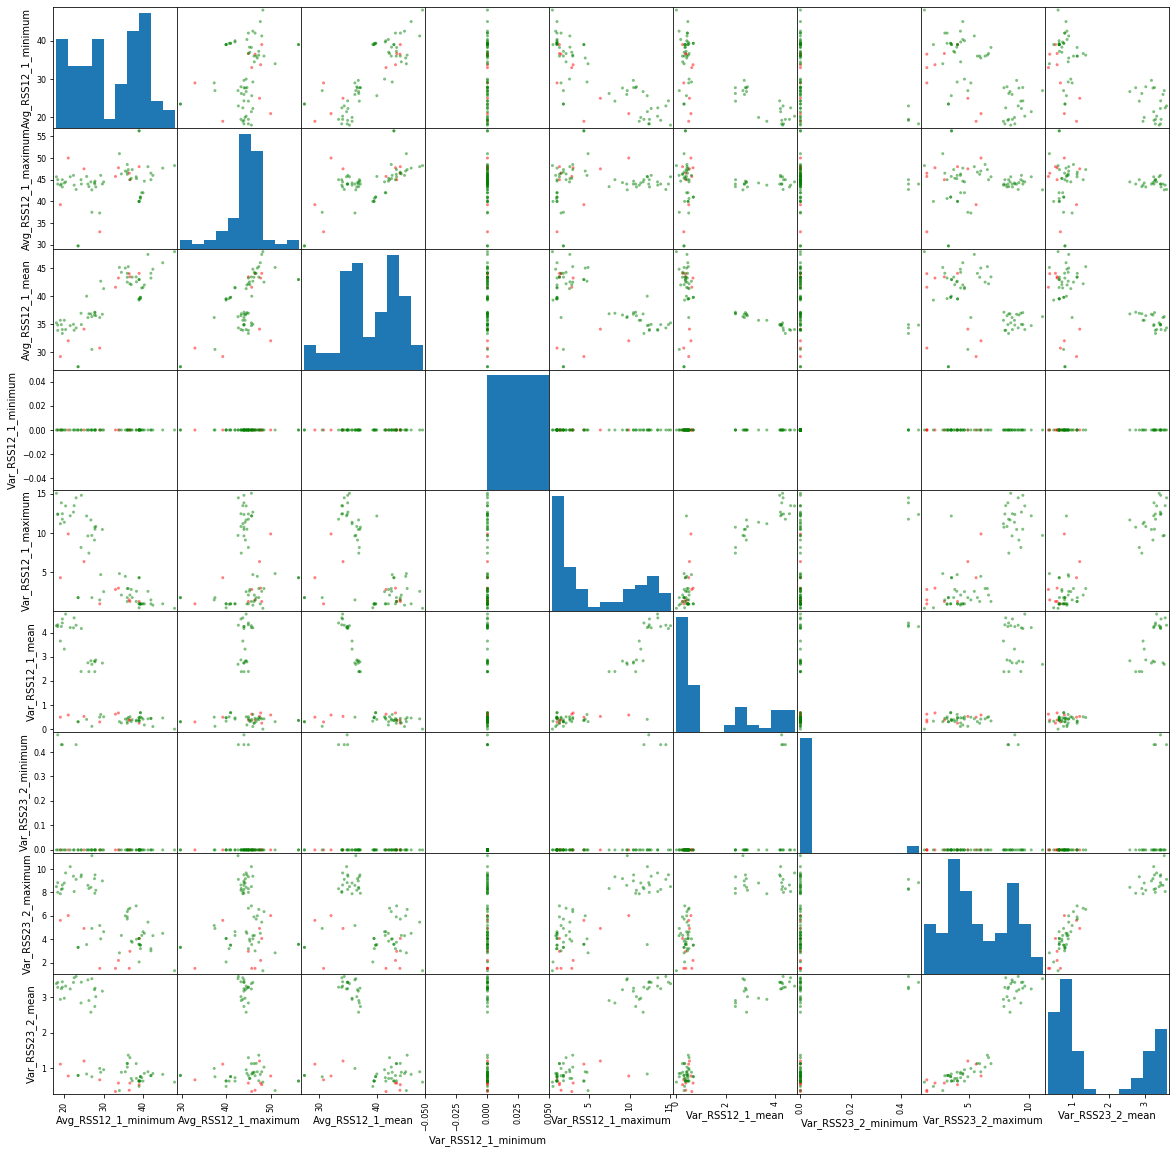

In [18]:
pd.plotting.scatter_matrix(df1, c = color_try(label_dual,'g','r'),figsize=(20,20))
plt.show()

Answer: **There is no specific difference between the two plot**.

#### iii. Break each time series in your training set into l ∈{1,2,...,20} time series of approximately equal length and use logistic regression5 to solve the binary classiﬁcation problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and reﬁt a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l,p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratiﬁed cross validation. Research what it means and use it if needed.

In [9]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')



l_score = {}
best_features_names_dataframe = {}
for i in range(1,21):
    
    X,y = split_data(data_sum,train_data,i)

    model = LogisticRegression(max_iter = 30)# stop the algorithm immaturely and prevent from its instability
    model_cv = RFECV(estimator=model,step=1,cv=StratifiedKFold(5,shuffle = True),scoring='accuracy')
    model_cv.fit(X, y)
    
    l_score[i] = [model_cv.grid_scores_[model_cv.n_features_ - 1],model_cv.n_features_]

In [10]:
l_score

{1: [1.0, 8],
 2: [0.9714285714285715, 2],
 3: [0.9714285714285715, 1],
 4: [0.9571428571428571, 17],
 5: [0.9714285714285715, 4],
 6: [0.9714285714285715, 19],
 7: [0.9571428571428571, 2],
 8: [0.956043956043956, 1],
 9: [0.9857142857142858, 8],
 10: [0.9571428571428573, 391],
 11: [0.956043956043956, 27],
 12: [0.9857142857142858, 5],
 13: [0.9714285714285715, 5],
 14: [0.9714285714285715, 1],
 15: [0.9857142857142858, 19],
 16: [0.9857142857142858, 58],
 17: [0.9857142857142858, 23],
 18: [1.0, 4],
 19: [0.9857142857142858, 9],
 20: [1.0, 17]}

**The first element under keys is the accuracy and the second is the selected feature**

According to the answer, there are three senarios reaching the largest accuracy. However, when the data have more features and sparse, the logistic regression is not suitable. So I choose **[l,p] = [1,8]**. 

**The right way: Do the every feature selection procedure in every Cross-Validation step**

#### iv. Report the confusion matrix and show the ROC and AUC for your classiﬁer on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them. 

In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

l = 1
p = 8

X_train,y_train = split_data(data_sum,train_data,l)
X_test, y_test = split_data(data_sum,test_data,l)

pre_model = LogisticRegression(max_iter = 40)# stop the algorithm immaturely and prevent from its instability
pre_model = RFE(estimator=pre_model,n_features_to_select=p)
pre_model.fit(X_train, y_train)

index_selection = []
for index,pos in zip(list(X_train.columns),pre_model.support_):
    if pos == True:
        index_selection.append(index)

X_selected = X_train[index_selection]

model = LogisticRegression(max_iter = 40)# stop the algorithm immaturely and prevent from its instability
model.fit(X_selected,y_train)
y_pred_train = model.predict(X_train[index_selection])

In [107]:
from sklearn.metrics import confusion_matrix 
from astropy.table import Table,Column

tn, fp, fn, tp = confusion_matrix(y_train,y_pred_train).ravel()
a = [[tp,fp],[fn,tn]]
print ('Confusion Matrix :(show like matrix)')
dic = {'Pre/True':Column([1,0],name='axis'),'1':(tp,fn),'0':(fp,tn)}
t = Table(dic,names = ('Pre/True','1','0'))
print(t)
#print('\n'.join([''.join(['{:4}'.format(item) for item in row])  for row in a]))#show like a matrix

Confusion Matrix :(show like matrix)
Pre/True  1   0 
-------- --- ---
       1   9   0
       0   0  60


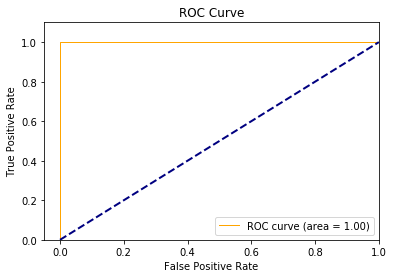

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_train, y_pred_train)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [109]:
print('the area under curve is',roc_auc)

the area under curve is 1.0


**The area under curve is 1**

In [110]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_selected)
logit_model.raise_on_perfect_prediction = False
results=logit_model.fit()
print(results.summary().as_text)

         Current function value: 0.000000
         Iterations: 35
<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       61
Method:                           MLE   Df Model:                            7
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                   1.000
Time:                        19:54:06   Log-Likelihood:            -4.5857e-08
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 3.041e-09
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Avg_RSS12_1_mean          -4.1936   1.7

##### v. Test the classiﬁer on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classiﬁer has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously

In [113]:
accuracy = model.score(X_test[index_selection],y_test)
accuracy

1.0

In [74]:
from astropy.table import Table
t = Table()
data=[{'CV test error':l_score[0][1],'Test Error':accuracy}]
t= Table(rows=data)
print(t)

CV test error Test Error
------------- ----------
            1        1.0


#### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

**Yes, I set the maximum iteration 40 to aviod the influence**

#### vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model. 

Yes,$\frac{60}{9} = 6.67$ ,so it is the **imbalanced** data.

In [131]:
X_train,y_train = split_data(data_sum,train_data,1)
X_test, y_test = split_data(data_sum,test_data,1)

#df_majority = X_train[y_train ==0]
X_train['label'] = y_train

In [132]:
from sklearn.utils import resample

X_train,y_train = split_data(data_sum,train_data,1)
X_test, y_test = split_data(data_sum,test_data,1)

X_train['label'] = y_train

df_majority = X_train[X_train['label'] == 0] 
df_minority = X_train[X_train['label'] == 1] 
 
# Upsample minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=60)  


# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['label'].value_counts()



1    60
0    60
Name: label, dtype: int64

In [134]:
y_train1 = df_upsampled['label']
X_train1 = df_upsampled.drop(['label'],axis =1)

pre_model = LogisticRegression(max_iter = 40)# stop the algorithm immaturely and prevent from its instability
pre_model = RFE(estimator=pre_model,n_features_to_select=10)
pre_model.fit(X_train1,y_train1)

index_selection = []
for index,pos in zip(list(X_train1.columns),pre_model.support_):
    if pos == True:
        index_selection.append(index)

X_selected = X_train1[index_selection]

model = LogisticRegression(max_iter = 40)# stop the algorithm immaturely and prevent from its instability

model.fit(X_selected,y_train1)
y_pred_train = model.predict(X_selected[index_selection])
print('test accuracy',model.score(X_test[index_selection],y_test))

tn, fp, fn, tp = confusion_matrix(y_train1,y_pred_train).ravel()
a = [[tp,fp],[fn,tn]]
print ('Confusion Matrix :(show like matrix)')
dic = {'Pre/True':Column([1,0],name='axis'),'1':(tp,fn),'0':(fp,tn)}
t = Table(dic,names = ('Pre/True','1','0'))
print(t)
#print('\n'.join([''.join(['{:4}'.format(item) for item in row])  for row in a]))#show like a matrix

test accuracy 1.0
Confusion Matrix :(show like matrix)
Pre/True  1   0 
-------- --- ---
       1  60   0
       0   0  60


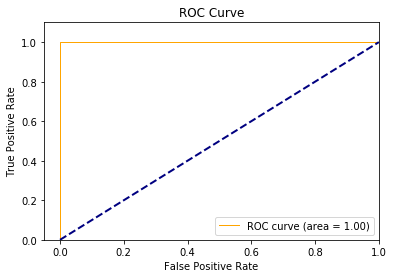

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_train1, y_pred_train)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### (e) Binary Classiﬁcation Using L1-penalized logistic regression


#### i. Repeat 1(d)iii using L1-penalized logistic regression i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [120]:
from sklearn.linear_model import LogisticRegressionCV

I = range(1,21)
acc1 = []
test_score = []
coef = {}
cept = {}
l1_ratio = {}
for i in I:
    
    X_train,y_train = split_data(data_sum,train_data,i)
    X_test, y_test = split_data(data_sum,test_data,i)

    model = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(X_train, y_train)
    score = model.score(X_train, y_train) 
    test_score.append(model.score(X_test, y_test))
    acc1.append(score)
    coef[i] = model.coef_
    cept[i] = model.intercept_

In [128]:
print("training accuracy",acc1)
print("test accuracy",test_score)

training accuracy [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test accuracy [1.0, 1.0, 1.0, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 1.0, 1.0, 0.9473684210526315, 1.0, 0.9473684210526315, 1.0, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]


In [130]:
coef[1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.40511381,  0.        , -0.22580188,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.19231245,  0.42105972,
         0.        ,  0.        ,  0.        ,  0.19344545,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

According to the answer, there are three senarios reaching the largest accuracy. However, when the data have more features and sparse, the logistic regression is not suitable. So I choose **[l,p] = [1,5]**. 

#### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

The L1-penalized with variable selection is better, because it can obtain the higher predicting scores.\
Besides, it easy to implement with less running time.

### (f) Multi-class Classiﬁcation (The Realistic Case)

#### i. Find the best l in the same way as you found it in 1(e)i to build an L1 penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are deﬁned for multiclass classiﬁcation and show them for this problem if possible.

In [136]:
import statistics as stat
def multi_split_data(data_sum,train_data,num):
    k = 1
    label_pre = {'bending':1,'cycling':2,'lying':3,'sitting':4,'standing':5,'walking':6}
    I = [str(i+1) for i in range(num)]
    stat_total = []
    label = []
    
    for key in train_data.keys():
        df_iter = [k]
        names = ["Instance"]
        
        for pre_la in label_pre.keys():
            if pre_la in key:
                label.append(label_pre[pre_la])
            

        for index, col in enumerate(data_sum[key].columns[1:]):
            data = {}
            len_unit = int(np.floor(len(data_sum[key][col])/num))
            for j in  I:
                if j == I[-1]:
                    data[j] = data_sum[key][col][(int(j)-1)*len_unit:len(data_sum[key][col])-1]
                else:
                    data[j] = data_sum[key][col][(int(j)-1)*len_unit:int(j)*len_unit]

            for item in I:

                df_iter+=stat_cal(data[item])
                
                title = [col +'_'+item + "_minimum",col+'_'+item  + "_maximum",col+'_'+item  + "_mean"
                    ,col+'_'+item  + "_median",col+'_'+item  + "_standard_deviation",col +'_'+item + "_1_quartile"
                    ,col +'_'+item + "_3_quartile"]
                
                names += title
        stat_total.append(df_iter)
        k+=1
        
    data_frame = pd.DataFrame(stat_total, columns=names)
    data_frame.set_index('Instance', inplace=True)
    
    return data_frame,label

In [91]:
from sklearn.linear_model import LogisticRegressionCV

I = range(1,21)
err = []
for i in I:
    
    X_train,y_train = multi_split_data(data_sum,train_data,i)
    X_test, y_test = multi_split_data(data_sum,test_data,i)

    model = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(X_train, y_train)
    score =1 -  model.score(X_test, y_test) 
    err.append(score)

In [216]:
err

[0.052631578947368474,
 0.21052631578947367,
 0.21052631578947367,
 0.368421052631579,
 0.21052631578947367,
 0.21052631578947367,
 0.1578947368421053,
 0.1578947368421053,
 0.1578947368421053,
 0.10526315789473684,
 0.1578947368421053,
 0.1578947368421053,
 0.1578947368421053,
 0.1578947368421053,
 0.1578947368421053,
 0.10526315789473684,
 0.21052631578947367,
 0.1578947368421053,
 0.1578947368421053,
 0.1578947368421053]

**From the test error, the best the I is 1**

In [200]:
X_train,y_train = multi_split_data(data_sum,train_data,1)
X_test, y_test = multi_split_data(data_sum,test_data,1)

multi_model = LogisticRegression( penalty="l1", solver="liblinear").fit(X_train, y_train)
y_pred = multi_model.predict(X_test)

In [191]:
def multi_confusion(y_label,y_pred,num):
    if len(y_label)!= len(y_pred):
        raise TypeError
    matrix = [[0]*num for i in range(num)]
    for i in range(len(y_label)):
        matrix[y_pred[i]-1][y_label[i]-1]+=1
        
    df = pd.DataFrame(matrix,columns = [ 'True'+' '+str(i) for i in range(1,num+1)])
    df.index = ['pred'+' '+str(i) for i in range(1,num+1)]
    return df

In [192]:
print("------\"Confusion Matrix Test Set\"-------")
print(multi_confusion(y_test,y_pred,6))

------"Confusion Matrix Test Set"-------
        True 1  True 2  True 3  True 4  True 5  True 6
pred 1       4       0       0       0       0       0
pred 2       0       2       0       1       0       0
pred 3       0       0       3       0       1       0
pred 4       0       0       0       2       0       0
pred 5       0       0       0       0       2       0
pred 6       0       1       0       0       0       3


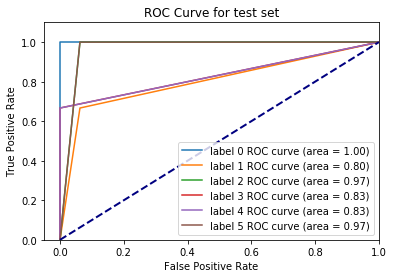

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize
label_binarize(y_pred, classes=[ 1, 2, 3, 4, 5,6])
cl = 6

y_test_ = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5,6])
y_pred_ = label_binarize(y_pred, classes=[ 1, 2, 3, 4, 5,6])

fpr = []
tpr = []
roc_auc = []
plt.figure()

for i in range(len(y_pred_[0])):

    temp1,temp2, _ = roc_curve(y_test_[:,i],y_pred_[:,i])
    fpr.append(temp1)
    tpr.append(temp2)
    roc_auc.append(auc(temp1, temp2))
    plt.plot(temp1, temp2, label='label %d ROC curve (area = %0.2f)' % (i,auc(temp1, temp2)))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend()
plt.show()

In [202]:
print("------\"Confusion Matrix Train Set\"-------")
print(multi_confusion(y_train, multi_model.predict(X_train),6))

------"Confusion Matrix Train Set"-------
        True 1  True 2  True 3  True 4  True 5  True 6
pred 1       9       0       0       0       0       0
pred 2       0      12       0       0       0       0
pred 3       0       0      12       0       0       0
pred 4       0       0       0      12       1       0
pred 5       0       0       0       0      11       0
pred 6       0       0       0       0       0      12


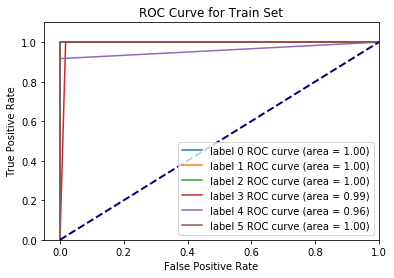

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize
label_binarize(y_pred, classes=[ 1, 2, 3, 4, 5,6])
cl = 6

y_test_ = label_binarize(y_train, classes=[ 1, 2, 3, 4, 5,6])
y_pred_ = label_binarize(multi_model.predict(X_train), classes=[ 1, 2, 3, 4, 5,6])

fpr = []
tpr = []
roc_auc = []
plt.figure()

for i in range(len(y_pred_[0])):

    temp1,temp2, _ = roc_curve(y_test_[:,i],y_pred_[:,i])
    fpr.append(temp1)
    tpr.append(temp2)
    roc_auc.append(auc(temp1, temp2))
    plt.plot(temp1, temp2, label='label %d ROC curve (area = %0.2f)' % (i,auc(temp1, temp2)))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend()
plt.show()

##### ii. Repeat 1(f)i using a Na¨ıve Bayes’ classiﬁer. Use both Gaussian and Multinomial priors and compare the results.

##### For Guassian

In [196]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV

I = range(1,21)
test_err = []
train_err = []

for i in I:
    
    X_train,y_train = multi_split_data(data_sum,train_data,i)
    X_test, y_test = multi_split_data(data_sum,test_data,i)
    params = {}
    
    gnm_model = GridSearchCV(GaussianNB(), cv=StratifiedKFold(n_splits=5),param_grid=params)
    gnm_model.fit(X_train, y_train)
    
    test_err.append(1 - gnm_model.score(X_test, y_test))#error rate
    train_err.append(1 - gnm_model.score(X_train, y_train))

In [234]:
print("the i for minimun test error is ",test_err.index(min(test_err))+1)
print(test_err)

the i for minimun test error is  1
[0.10526315789473684, 0.1578947368421053, 0.1578947368421053, 0.10526315789473684, 0.10526315789473684, 0.21052631578947367, 0.1578947368421053, 0.21052631578947367, 0.21052631578947367, 0.1578947368421053, 0.26315789473684215, 0.26315789473684215, 0.21052631578947367, 0.3157894736842105, 0.42105263157894735, 0.4736842105263158, 0.4736842105263158, 0.3157894736842105, 0.5263157894736843, 0.42105263157894735]


**From the test error, the best the I is 1**\
Calculate and show the confusion matrix and ROC Curve

In [199]:
X_train,y_train = multi_split_data(data_sum,train_data,1)
X_test, y_test = multi_split_data(data_sum,test_data,1)

model2 = GaussianNB().fit(X_train, y_train)
y_pred = model2.predict(X_test) 

print("------\"Confusion Matrix Test Set\"-------")
print(multi_confusion(y_test,y_pred,6))

print("------\"Confusion Matrix Train Set\"-------")
print(multi_confusion(y_train,model2.predict(X_train),6))

------"Confusion Matrix Test Set"-------
        True 1  True 2  True 3  True 4  True 5  True 6
pred 1       4       0       1       0       0       0
pred 2       0       3       0       0       0       0
pred 3       0       0       2       0       0       0
pred 4       0       0       0       3       1       0
pred 5       0       0       0       0       2       0
pred 6       0       0       0       0       0       3
------"Confusion Matrix Train Set"-------
        True 1  True 2  True 3  True 4  True 5  True 6
pred 1       8       0       0       0       0       0
pred 2       0      12       0       0       0       0
pred 3       1       0      12       0       0       0
pred 4       0       0       0      12       0       0
pred 5       0       0       0       0      12       0
pred 6       0       0       0       0       0      12


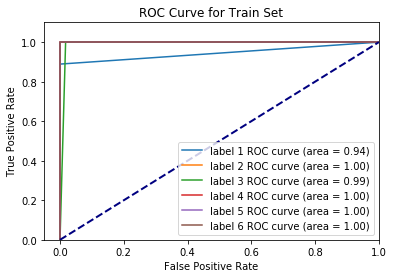

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize
label_binarize(y_pred, classes=[ 1, 2, 3, 4, 5,6])
cl = 6

y_test_ = label_binarize(y_train, classes=[ 1, 2, 3, 4, 5,6])
y_pred_ = label_binarize(model2.predict(X_train), classes=[ 1, 2, 3, 4, 5,6])

fpr = []
tpr = []
roc_auc = []
plt.figure()

for i in range(len(y_pred_[0])):

    temp1,temp2, _ = roc_curve(y_test_[:,i],y_pred_[:,i])
    fpr.append(temp1)
    tpr.append(temp2)
    roc_auc.append(auc(temp1, temp2))
    plt.plot(temp1, temp2, label='label %d ROC curve (area = %0.2f)' %(i+1,auc(temp1, temp2)))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend()
plt.show()

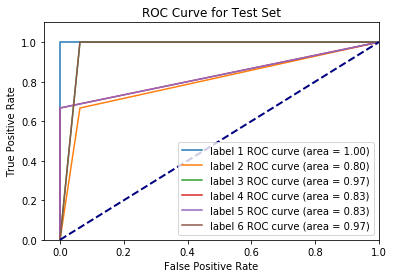

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize
cl =6

y_test_ = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5,6])
y_pred_ = label_binarize(y_pred, classes=[ 1, 2, 3, 4, 5,6])

fpr = []
tpr = []
roc_auc = []
plt.figure()

for i in range(len(y_pred_[0])):

    temp1,temp2, _ = roc_curve(y_test_[:,i],y_pred_[:,i])
    fpr.append(temp1)
    tpr.append(temp2)
    roc_auc.append(auc(temp1, temp2))
    plt.plot(temp1, temp2, label='label %d ROC curve (area = %0.2f)'%(i+1,auc(temp1, temp2)))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend()
plt.show()

##### For  Multinomial 

In [220]:
from sklearn.naive_bayes import MultinomialNB

I = range(1,21)
test_err1 = []
train_err1 = []

for i in I:
    
    X_train,y_train = multi_split_data(data_sum,train_data,i)
    X_test, y_test = multi_split_data(data_sum,test_data,i)
    params = {}
    
    gnm_model1 = GridSearchCV(MultinomialNB(), cv=StratifiedKFold(n_splits=5),param_grid=params)
    gnm_model1.fit(X_train, y_train)
    
    test_err1.append(1 - gnm_model1.score(X_test, y_test))#error rate
    train_err1.append(1 - gnm_model1.score(X_train, y_train))

In [233]:
print(test_err1.index(min(test_err1))+1)
print(test_err1)

17
[0.10526315789473684, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.10526315789473684, 0.1578947368421053, 0.10526315789473684, 0.10526315789473684, 0.10526315789473684, 0.10526315789473684, 0.052631578947368474, 0.052631578947368474, 0.052631578947368474, 0.052631578947368474]


**From the test error, the best the i in I is 17**\
Calculate and show the confusion matrix and ROC Curve

In [235]:
X_train,y_train = multi_split_data(data_sum,train_data,17)
X_test, y_test = multi_split_data(data_sum,test_data,17)

model3 = MultinomialNB().fit(X_train, y_train)
y_pred = model3.predict(X_test) 

print("------\"Confusion Matrix Test Set\"-------")
print(multi_confusion(y_test,y_pred,6))
print("------\"Confusion Matrix Train Set\"-------")
print(multi_confusion(y_train,model3.predict(X_train),6))

------"Confusion Matrix Test Set"-------
        True 1  True 2  True 3  True 4  True 5  True 6
pred 1       4       0       0       0       0       0
pred 2       0       3       0       0       0       0
pred 3       0       0       3       0       0       0
pred 4       0       0       0       2       0       0
pred 5       0       0       0       1       3       0
pred 6       0       0       0       0       0       3
------"Confusion Matrix Train Set"-------
        True 1  True 2  True 3  True 4  True 5  True 6
pred 1       9       0       0       1       0       0
pred 2       0      12       0       0       0       0
pred 3       0       0      12       1       0       0
pred 4       0       0       0      10       1       0
pred 5       0       0       0       0      11       0
pred 6       0       0       0       0       0      12


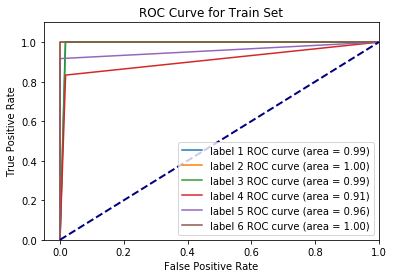

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize
cl =6

y_test_ = label_binarize(y_train, classes=[ 1, 2, 3, 4, 5,6])
y_pred_ = label_binarize(model3.predict(X_train), classes=[ 1, 2, 3, 4, 5,6])

fpr = []
tpr = []
roc_auc = []
plt.figure()

for i in range(len(y_pred_[0])):

    temp1,temp2, _ = roc_curve(y_test_[:,i],y_pred_[:,i])
    fpr.append(temp1)
    tpr.append(temp2)
    roc_auc.append(auc(temp1, temp2))
    plt.plot(temp1, temp2, label='label %d ROC curve (area = %0.2f)'%(i+1,auc(temp1, temp2)))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend()
plt.show()

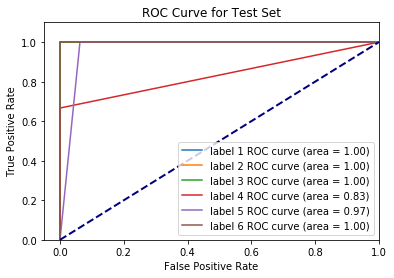

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize
cl =6

y_test_ = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5,6])
y_pred_ = label_binarize(y_pred, classes=[ 1, 2, 3, 4, 5,6])

fpr = []
tpr = []
roc_auc = []
plt.figure()

for i in range(len(y_pred_[0])):

    temp1,temp2, _ = roc_curve(y_test_[:,i],y_pred_[:,i])
    fpr.append(temp1)
    tpr.append(temp2)
    roc_auc.append(auc(temp1, temp2))
    plt.plot(temp1, temp2, label='label %d ROC curve (area = %0.2f)'%(i+1,auc(temp1, temp2)))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend()
plt.show()

##### iii.  Which method is better for multi-class classification in this problem? as per 1(f)

     The Multinomial Naive Bayes is better, because it can reach the less test error rate.